# Exercise 6

## Question 1

Complete the following method to compute the modularity measure of a graph.

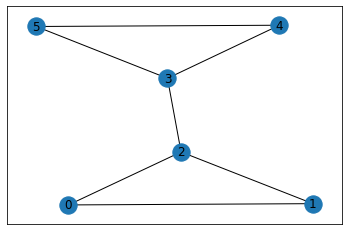

In [8]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [12]:
nx.betweenness_centrality(G, k=1, normalized=True, weight=None,seed=None)
nx.edge_betweenness_centrality(G, k=None, normalized=False, weight=None,seed=None)

{(0, 1): 1.0,
 (0, 2): 4.0,
 (1, 2): 4.0,
 (2, 3): 9.0,
 (3, 4): 4.0,
 (3, 5): 4.0,
 (4, 5): 1.0}

In [5]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [28]:
import itertools
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    nodes_dct = {}
    for node in G.nodes:
        community = G.nodes[node]['community']
        if community in nodes_dct:
            current_list = nodes_dct[community]
            current_list.append(node)
            nodes_dct[community] = current_list
        else:
            nodes_dct[community] = [node]
    # number of links between nodes in module "S"    
    for community, value_list in nodes_dct.items():
        ls = 0
        ds = 0
        combinations = itertools.combinations(value_list, 2)
        # finds number of links between nodes in each module
        for subset in combinations: 
            links = G.number_of_edges(subset[0],subset[1])
            ls += links
        for node_id in value_list:
            ds += G.degree[node_id]
        Q += ls/m - (ds/(2*m))**2
            
                
    return Q

In [29]:
compute_modularity(G)

0.3571428571428571

## Question 2

Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

#### Question

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.